<a href="https://colab.research.google.com/github/hanasgnt/PCVK_2024_14/blob/main/week12_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Hana Sugianto**

**NIM   : 2241720102**

**Kelas : TI 3E / 14**

Link github : https://github.com/hanasgnt/PCVK_2024_14/blob/main/week12_14.ipynb

#### **D. Tugas Praktikum 🕵🏻‍♂️**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!sudo apt install tesseract-ocr
!sudo apt install tesseract-ocr-ind
!sudo apt install libtesseract-dev
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,266 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [5]:
import os
import pytesseract
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from google.colab.patches import cv2_imshow
from PIL import Image
import cv2
import numpy as np
import PIL
import io
import html
import time

### **Detect face manusia**

In [6]:
import os
print(os.path.exists('/content/drive/MyDrive/PCVK_2024/Face Detection/haarcascades/haarcascade_frontalface_alt.xml'))

True


##### **No 2; Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet)**

In [145]:
import cv2 as cv
import matplotlib.pyplot as plt

def detect_face(image_path):
    cascade_path = '/content/drive/MyDrive/PCVK_2024/Face Detection/haarcascades/haarcascade_frontalface_alt.xml'
    cascade_wajah = cv.CascadeClassifier(cascade_path)

    image = cv.imread(image_path)
    image_face = image.copy()
    gray = cv.cvtColor(image_face, cv.COLOR_BGR2GRAY)

    roi_wajah = cascade_wajah.detectMultiScale(gray)

    for (x, y, w, h) in roi_wajah:
        cv.rectangle(image_face, (x, y), (x + w, y + h), (0, 255, 0), 2)

    image_face = cv.cvtColor(image_face, cv.COLOR_BGR2RGB)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    return image, image_face

In [146]:
def plot_detect(original_image, detected_image):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Detected Faces")
    plt.imshow(detected_faces_image)
    plt.axis('off')

    plt.show()

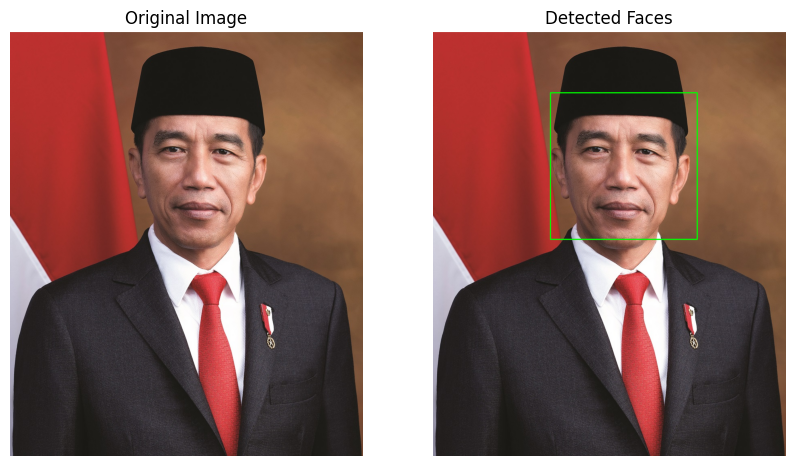

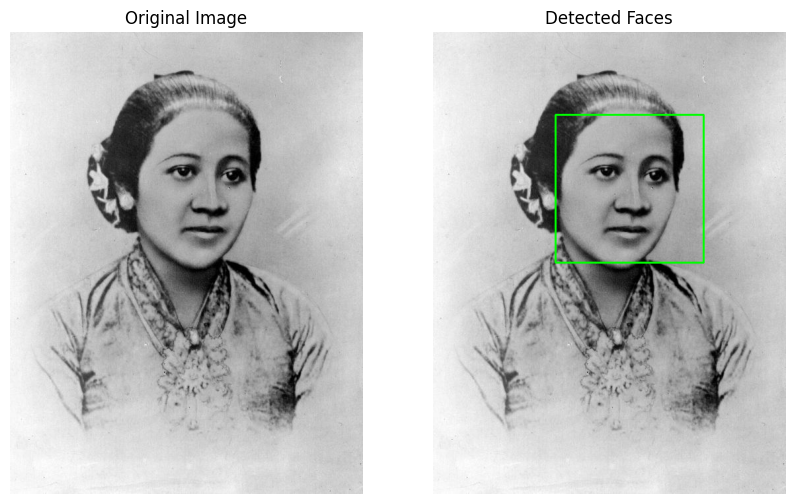

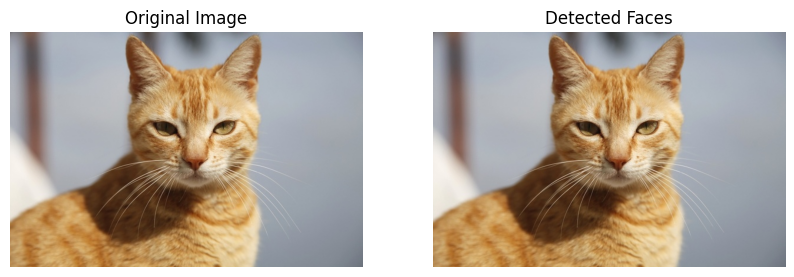

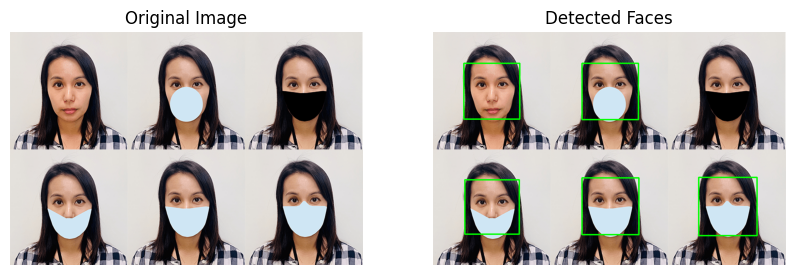

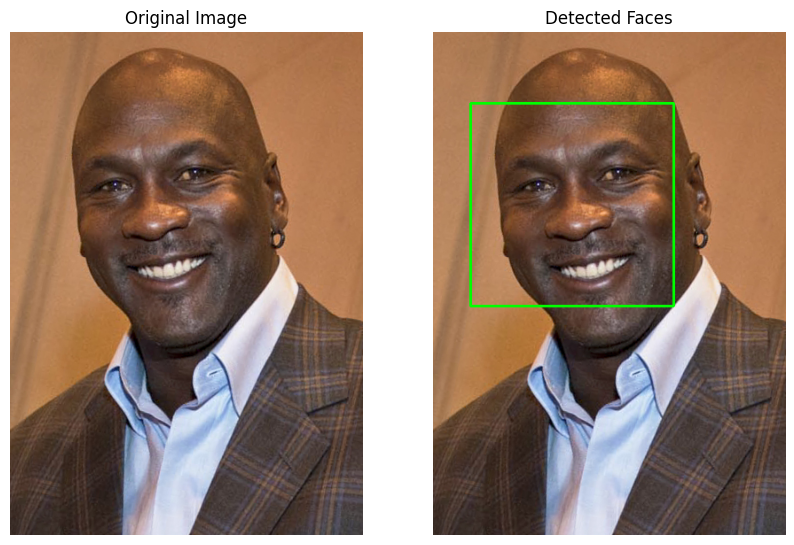

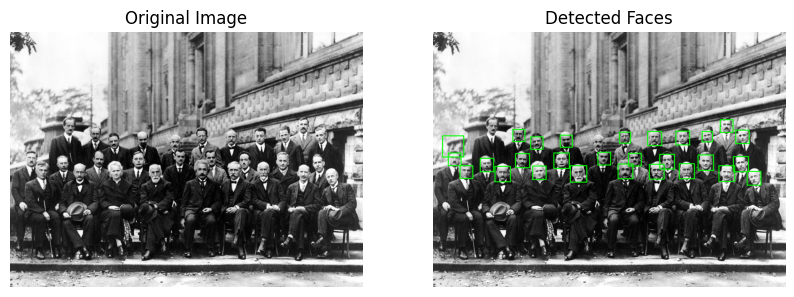

In [147]:
original_image, detected_faces_image = detect_face('/content/drive/MyDrive/PCVK_2024/Face Detection/facedet/jokowi.jpg')
plot_detect(original_image, detected_faces_image)

original_image, detected_faces_image = detect_face('/content/drive/MyDrive/PCVK_2024/Face Detection/facedet/kartini.jpg')
plot_detect(original_image, detected_faces_image)

original_image, detected_faces_image = detect_face('/content/drive/MyDrive/PCVK_2024/Face Detection/facedet/mycat.jpg')
plot_detect(original_image, detected_faces_image)

original_image, detected_faces_image = detect_face('/content/drive/MyDrive/PCVK_2024/Face Detection/facedet/mask.png')
plot_detect(original_image, detected_faces_image)

original_image, detected_faces_image = detect_face('/content/drive/MyDrive/PCVK_2024/Face Detection/facedet/mjordan.jpg')
plot_detect(original_image, detected_faces_image)

original_image, detected_faces_image = detect_face('/content/drive/MyDrive/PCVK_2024/Face Detection/facedet/solvayconf.jpg')
plot_detect(original_image, detected_faces_image)

##### **No 3; Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya.**

Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

In [16]:
def detect_cat_face(image_path):
  cat_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2024/Face Detection/haarcascades/haarcascade_frontalcatface.xml')

  image = cv.imread(image_path)
  image_face = image.copy()
  gray = cv.cvtColor(image_face, cv.COLOR_BGR2GRAY)

  faces = cat_cascade.detectMultiScale(gray, scaleFactor=1.15, minNeighbors=5, minSize=(80, 80))

  for (x, y, w, h) in faces:
      cv.rectangle(image_face, (x, y), (x + w, y + h), (0, 255, 0), 2)

  image_face = cv.cvtColor(image_face, cv.COLOR_BGR2RGB)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  return image, image_face


In [17]:
def plot_cat_detection(original_image, detected_faces_image):
    """
    Menampilkan gambar asli dan gambar dengan deteksi wajah berdampingan.

    Parameters:
    - original_image (numpy.ndarray): Gambar asli dalam format RGB.
    - detected_faces_image (numpy.ndarray): Gambar dengan deteksi wajah dalam format RGB.
    """
    plt.figure(figsize=(10, 10))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis('off')

    # Gambar dengan deteksi wajah
    plt.subplot(1, 2, 2)
    plt.title("Detected Cat Faces")
    plt.imshow(detected_faces_image)
    plt.axis('off')

    plt.show()

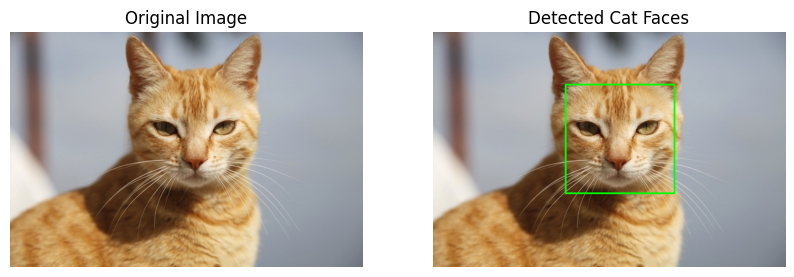

In [18]:
original_image, detected_cat_faces_image = detect_cat_face('/content/drive/MyDrive/PCVK_2024/Face Detection/facedet/mycat.jpg')
plot_cat_detection(original_image, detected_cat_faces_image)

##### **No 4: Cobakan juga untuk eyes detection**

In [19]:
def detect_eye(image_path):
  cascade_path = '/content/drive/MyDrive/PCVK_2024/Face Detection/haarcascades/haarcascade_eye.xml'
  eye_cascade = cv.CascadeClassifier(cascade_path)

  image = cv.imread(image_path)
  image_eye = image.copy()
  image_eye = cv.cvtColor(image_eye, cv.COLOR_BGR2GRAY)

  eyes = eye_cascade.detectMultiScale(image_eye)

  # Membuat kotak di sekitar wajah
  for (x, y, w, h) in eyes:
      cv.rectangle(image_eye, (x, y), (x + w, y + h), (255, 255, 255), 2)

  # Melakukan konversi channel warna ke rgb
  image_eye = cv.cvtColor(image_eye, cv.COLOR_BGR2RGB)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  return image, image_eye

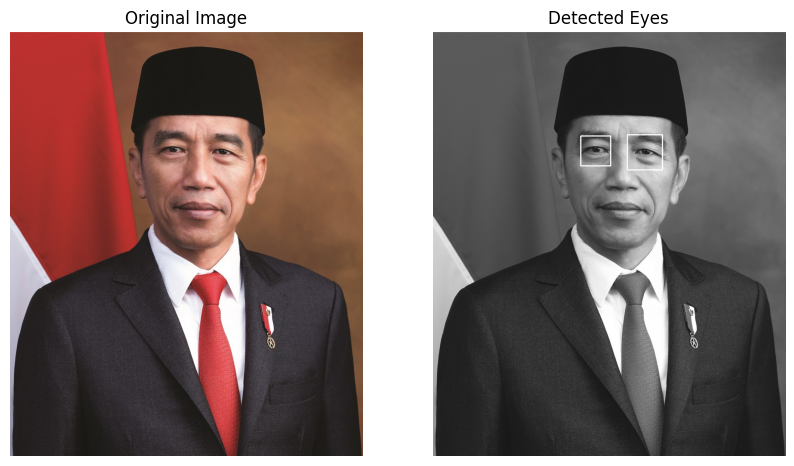

In [20]:
jokowi, jokowi_eyes = detect_eye('/content/drive/MyDrive/PCVK_2024/Face Detection/facedet/jokowi.jpg')

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(jokowi)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Detected Eyes")
plt.imshow(jokowi_eyes, cmap='gray')
plt.axis('off')

plt.show()

##### **No 5; Lakukan Face Tracking menggunakan Google Colab.**

Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [58]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [59]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [60]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

**Webcam**

In [24]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


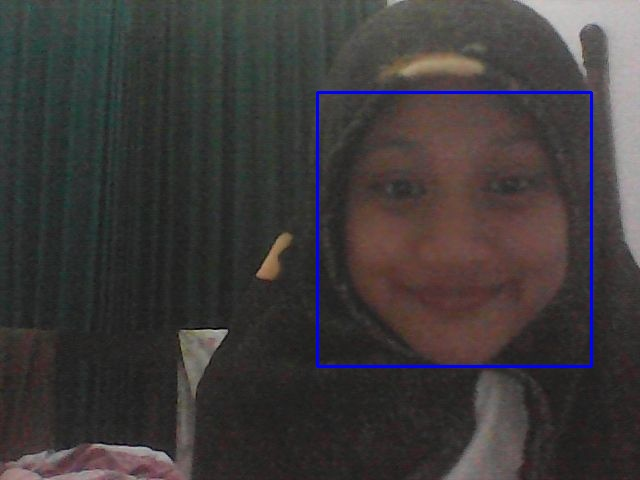

In [49]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**Video cam**

In [26]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [61]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

##### **No 6; Lakukan Blurring pada bagian wajah yang terdeteksi.**

Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

In [30]:
def detect_and_blur_face(image_path):
    cascade_path = '/content/drive/MyDrive/PCVK_2024/Face Detection/haarcascades/haarcascade_frontalface_alt.xml'
    cascade_wajah = cv.CascadeClassifier(cascade_path)
    image = cv.imread(image_path)

    blurred_image = image.copy()
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    roi_wajah = cascade_wajah.detectMultiScale(gray)

    for (x, y, w, h) in roi_wajah:
        wajah = blurred_image[y:y+h, x:x+w]
        wajah_blur = cv.medianBlur(wajah, 35)
        blurred_image[y:y+h, x:x+w] = wajah_blur

    original_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    blurred_image = cv.cvtColor(blurred_image, cv.COLOR_BGR2RGB)

    return original_image, blurred_image

In [31]:
def plot_face_blurring(original_image, blurred_image):
    """
    Menampilkan gambar asli dan gambar dengan wajah yang diblur berdampingan.

    Parameters:
    - original_image (numpy.ndarray): Gambar asli dalam format RGB.
    - blurred_image (numpy.ndarray): Gambar dengan wajah yang diblur dalam format RGB.
    """
    plt.figure(figsize=(10, 10))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis('off')

    # Gambar dengan wajah diblur
    plt.subplot(1, 2, 2)
    plt.title("Blurred Faces")
    plt.imshow(blurred_image)
    plt.axis('off')

    plt.show()

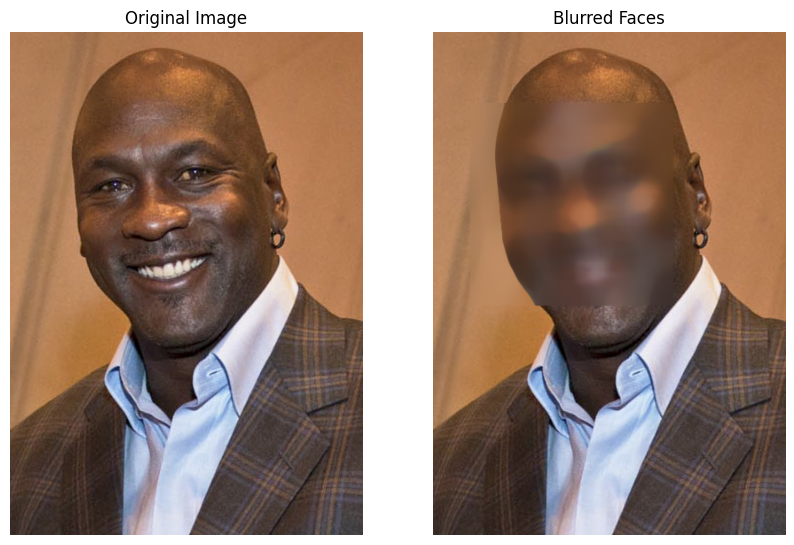

In [32]:
original_image, blurred_image = detect_and_blur_face('/content/drive/MyDrive/PCVK_2024/Face Detection/facedet/mjordan.jpg')
plot_face_blurring(original_image, blurred_image)

##### **No 7; Lakukan segmentasi karakter pada KTP seperti gambar berikut (blom)**
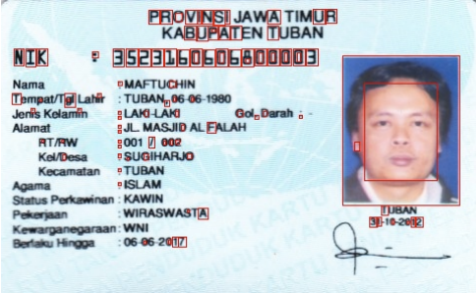

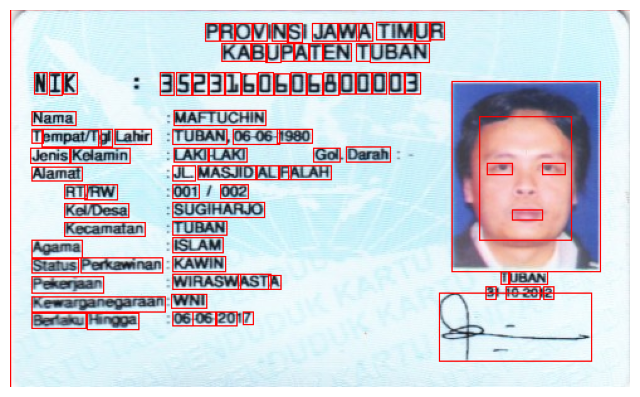

In [63]:
ktp_img = cv.imread('/content/drive/MyDrive/PCVK_2024/Object Detection/KTP_More/ktp3.png')

# Filtering
blurred = cv2.GaussianBlur(ktp_img, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

img_draw = ktp_img.copy()

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  ras = format(w / h, '.2f')
  if h >= 40 and w >= 10 and float(ras) <= 1:
    cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
  elif h >= 8 and w >= 8 and float(ras) <= 10:
    cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
  elif h >= 10 and w >= 7 and float(ras) <= 8:
    cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(8, 6))
plt.imshow(cv.cvtColor(img_draw, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

##### **No 8; Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut**
image.png

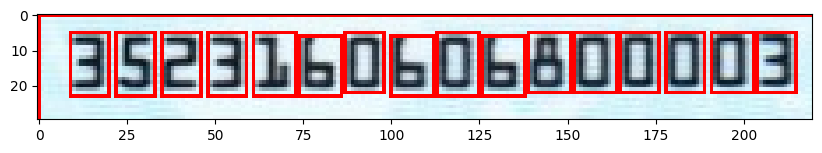

In [36]:
ktp = '/content/drive/MyDrive/PCVK_2024/Object Detection/KTP_More/ktp3.png'
img = cv2.imread(ktp)

crop_ktp = img[45:75, 110:330]
blurred = cv2.GaussianBlur(crop_ktp, (5, 5), 0.5)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

_, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

img_draw = crop_ktp.copy()
contours, _ = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  ras = format(w / h, '.2f')
  if h >= 40 and w >= 10 and float(ras) <= 1:
    cv2.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
  elif h >= 8 and w >= 8 and float(ras) <= 10:
    cv2.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
  elif h >= 10 and w >= 7 and float(ras) <= 8:
    cv2.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))

##### **No 9; Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter.**

Sebelum melakukan training data, terlebih dahulu disiapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.

In [53]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

##### **No 10; Lakukan Training Data**

In [57]:
import pickle
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    ZeroPadding2D,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
)
from tensorflow.keras.optimizers import Adam

# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

# Normalize data if not already normalized
X = X / 255.0

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation="relu")(flaten)
fc_layer = Dense(64, activation="relu")(fc_layer)

# Output layer
outputs = Dense(10, activation="softmax")(fc_layer)

# Compile the model
adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X, Y, epochs=20, verbose=1)

# Save the model in .keras format (recommended) or .h5
model.save("anpr.keras")  # Format native Keras
model.save("anpr_model.h5")    # Format HDF5 (opsional)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.1480 - loss: 2.2940
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3875 - loss: 2.2316
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4404 - loss: 2.0447
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6247 - loss: 1.5824
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8028 - loss: 0.9136
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8215 - loss: 0.6541
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8292 - loss: 0.5641
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8600 - loss: 0.4634
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8843 - loss: 0.4421
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8928 - loss: 0.3687
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8901 - loss: 0.4132
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy:

##### **No 11; Testing Data**

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9443 - loss: 0.1896
Accuracy on the test set: 95.50%


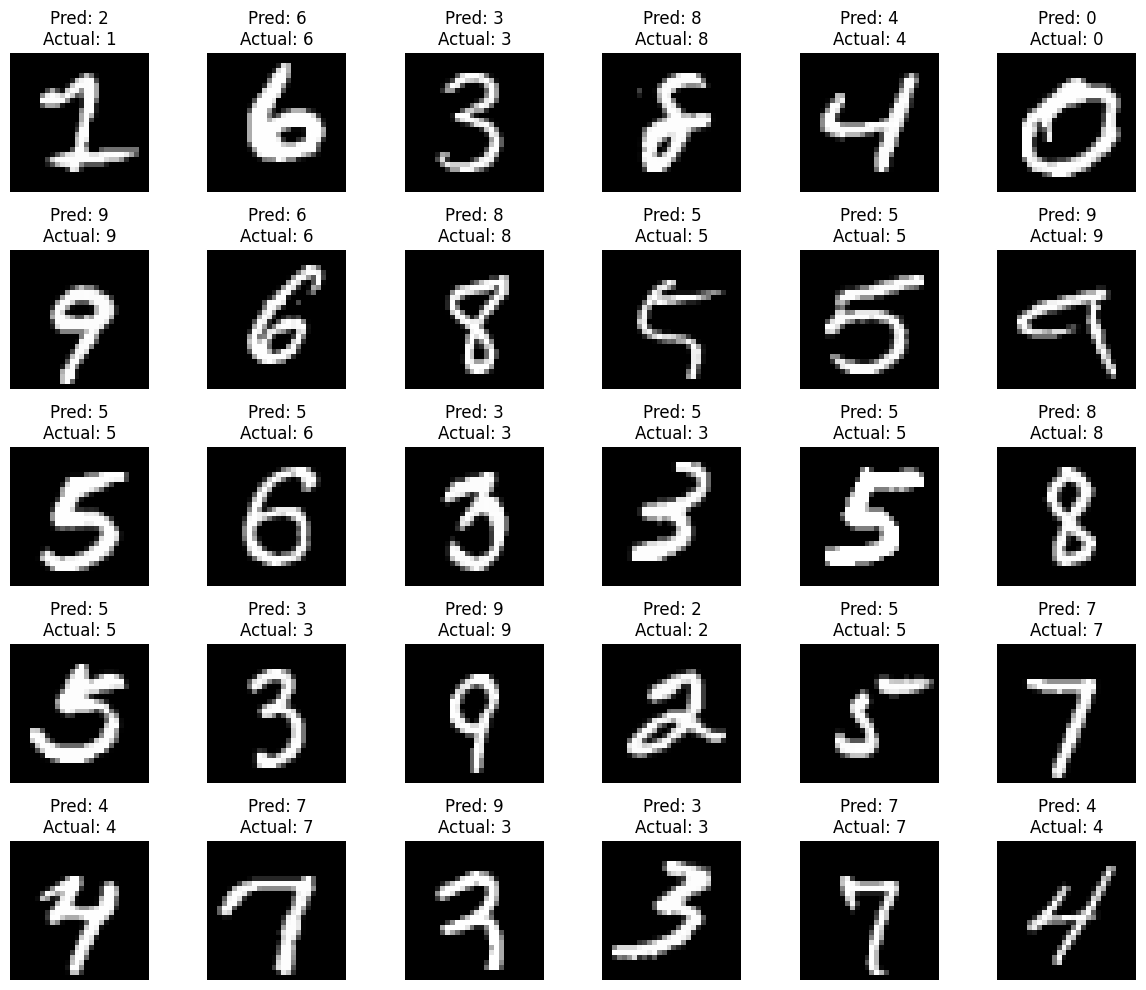

In [64]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr_model.h5")  # Perbaiki dengan nama file model yang benar

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Tampilkan 30 hasil uji dengan gambarnya
num_results_to_display = 30
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Ambil gambar dari data testing
    img = X_test[i].reshape((28, 28))  # Mengasumsikan gambar berukuran 28x28 pixels

    # Tampilkan gambar dan label
    axes[i // 6, i % 6].imshow(img, cmap='gray')
    axes[i // 6, i % 6].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 6, i % 6].axis('off')

plt.tight_layout()
plt.show()

#### **TUGAS 🐰**

##### **Install**

##### **Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!**

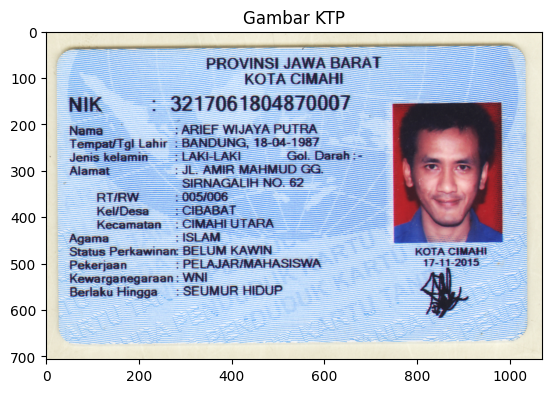

In [68]:
image_path = "/content/drive/MyDrive/PCVK_2024/Object Detection/KTP_More/ktp2.png"

# Baca dan tampilkan gambar
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Gambar KTP")
plt.show()

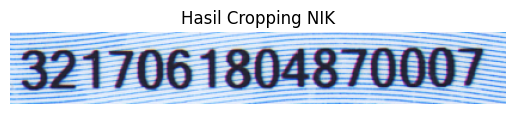

In [95]:
# Mententukan koordinat cropping (x, y, w, h)
x, y, w, h = 260, 125, 415, 60

# cropping
cropped_image = image[y:y+h, x:x+w]

cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_image_rgb)
plt.axis("off")
plt.title("Hasil Cropping NIK")
plt.show()

In [96]:
# Mengubah gambar ke grayscale
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Melakukan thresholding pada gambar grayscale
_, threshed = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Menggunakan pytesseract untuk mengenali teks pada gambar threshold
result = pytesseract.image_to_string(PIL.Image.fromarray(threshed), lang="ind")

# Menampilkan hasil pengenalan teks
print("NIK From e-KTP is :", result)

NIK From e-KTP is : 3217061804870007

